In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../../Functions/')

from EDA_functions import ExploratoryDataAnalysis
eda = ExploratoryDataAnalysis()

In [12]:
pd.options.display.max_rows = 150 
pd.set_option("display.max_colwidth", 300)
plt.style.use('seaborn-darkgrid')

In [13]:
columns_desc = pd.read_csv('../../Datasets/HomeCredit_columns_description.csv', encoding = 'latin-1', index_col = 0)
columns_desc.replace('SK_ID_PREV ', 'SK_ID_PREV', inplace = True)

### 5. Installments Payments

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is: (a) one row for every payment that was made plus; (b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is: (a) one row for every payment that was made plus; (b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [14]:
# reading the dataset
install_payments = pd.read_csv("../../Datasets/installments_payments.csv")

Firstly, let's analyze the shape of the dataset.

In [15]:
print("The Installment Payments Set has %d rows and %d columns." % (
    install_payments.shape[0], install_payments.shape[1]))

The Installment Payments Set has 13605401 rows and 8 columns.


In [16]:
columns_desc[columns_desc['Table'] == '../../Datasets/installments_payments.csv']

Empty DataFrame
Columns: [Table, Row, Description, Special]
Index: []

In [17]:
install_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

[COMMENT]

#### 5.A. Missing Values

Let's see how is the dataset in terms of missing values.

In [18]:
eda.missing_values(install_payments)

From 8 columns, there are 2 that have missing values in this dataset.


Number of Nulls Percentage of Nulls
DAYS_ENTRY_PAYMENT             2905              0.021%
AMT_PAYMENT                    2905              0.021%

We hardly have any missing values. Perfect!

Also, these nulls correspond to payments that have not been made yet (open credit lines). Our data should only include debts that are terminated, so maybe a good strategy to deal with these lines would be to drop them (only 2905 lines).

#### 5.B. Column Data Types

Let's check the data types that we have for this dataset.

In [19]:
install_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


We have 5 columns that are of type 'float', 4 of type 'int'. This means that we only have numerical variables (8).

#### 5.C. Numerical Variables

In [20]:
np.array(install_payments.columns[install_payments.dtypes != 'object'])

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

[COMMENT]

count    13605401.00
mean            0.86
std             1.04
min             0.00
25%             0.00
50%             1.00
75%             1.00
max           178.00
Name: NUM_INSTALMENT_VERSION, dtype: float64


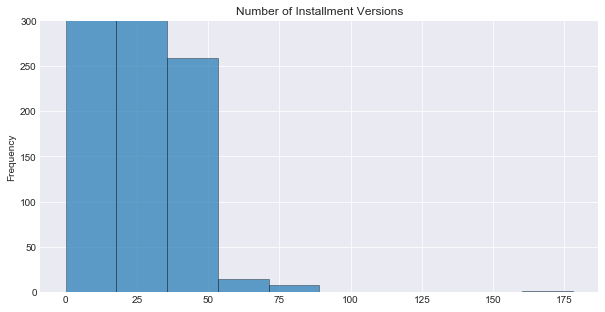

In [21]:
print(install_payments['NUM_INSTALMENT_VERSION'].describe().round(2))
eda.plot_hist(install_payments, 'NUM_INSTALMENT_VERSION', 'Number of Installment Versions', y_lim_sup = 300)

[COMMENT]

count    13605401.00
mean           18.87
std            26.66
min             1.00
25%             4.00
50%             8.00
75%            19.00
max           277.00
Name: NUM_INSTALMENT_NUMBER, dtype: float64


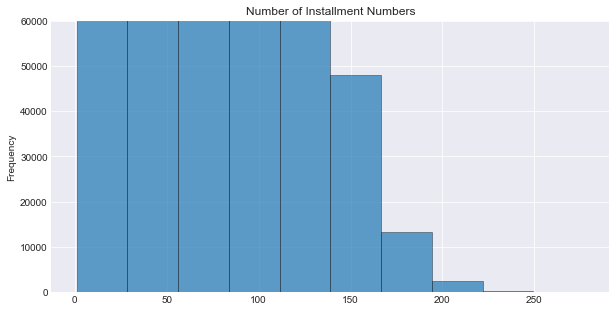

In [22]:
print(install_payments['NUM_INSTALMENT_NUMBER'].describe().round(2))
eda.plot_hist(install_payments, 'NUM_INSTALMENT_NUMBER', 'Number of Installment Numbers', y_lim_sup = 60000)

[COMMENT]

count   -37275.07
mean         2.86
std         -2.19
min          8.01
25%          4.53
50%          2.24
75%          0.99
max          0.00
Name: DAYS_INSTALMENT, dtype: float64


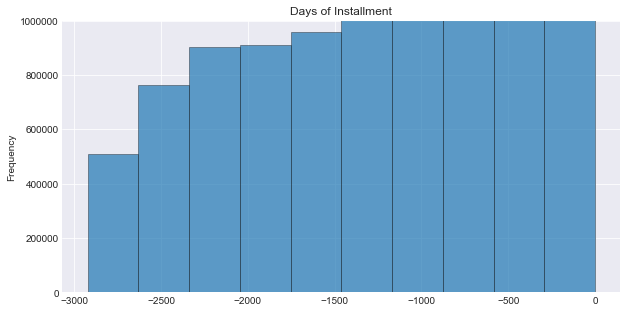

In [23]:
print((install_payments['DAYS_INSTALMENT'].describe() / -365).round(2))
eda.plot_hist(install_payments, 'DAYS_INSTALMENT', 'Days of Installment', y_lim_sup = 1000000)

[no outliers]

count   -37267.11
mean         2.88
std         -2.19
min         13.48
25%          4.55
50%          2.27
75%          1.01
max          0.00
Name: DAYS_ENTRY_PAYMENT, dtype: float64


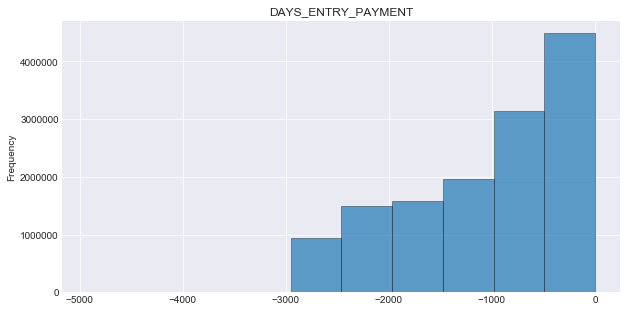

In [24]:
print((install_payments['DAYS_ENTRY_PAYMENT'].describe() / -365).round(2))
eda.plot_hist(install_payments, 'DAYS_ENTRY_PAYMENT', 'DAYS_ENTRY_PAYMENT')

[no outliers]

count    13605401.00
mean        17050.91
std         50570.25
min             0.00
25%          4226.08
50%          8884.08
75%         16710.21
max       3771487.84
Name: AMT_INSTALMENT, dtype: float64


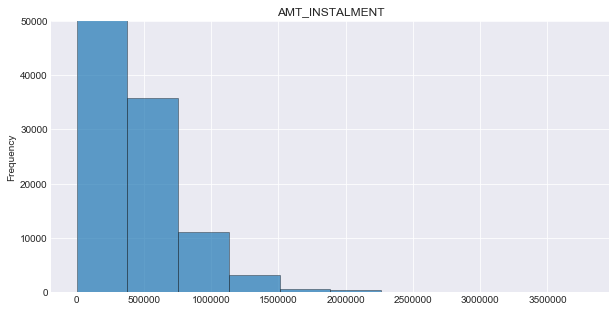

In [25]:
print(install_payments['AMT_INSTALMENT'].describe().round(2))
eda.plot_hist(install_payments, 'AMT_INSTALMENT', 'AMT_INSTALMENT', y_lim_sup = 50000)

[some outliers]

In [26]:
### plt.xticks([statistics.loc['mean', 'AMT_PAYMENT'] + statistics.loc['std', 'AMT_PAYMENT'],
###             statistics.loc['mean', 'AMT_PAYMENT'] + 2 * statistics.loc['std', 'AMT_PAYMENT'],
###             statistics.loc['mean', 'AMT_PAYMENT'] + 3 * statistics.loc['std', 'AMT_PAYMENT'] ])### 

Let's create two new variables:
- DAYS_DIF_ENTRYPAY_INSTAL: the difference between the day in which the payment was made (DAYS_ENTRY_PAYMENT) and the day in which the payment was supposed to be made (DAYS_INSTALMENT). If negative, means that the payment was made with delay. If positive, the payment was made before the date
- DIF_AMT_PAY_INSTAL: the difference the amount paid and the amount that was supposed to be paid. If positive, means that the person paid more than what was supposed for that installment. If negative, means that the installment wasn't fully paid- DAYS_DIF_ENTRYPAY_INSTAL: the difference between the day in which the payment was made (DAYS_ENTRY_PAYMENT) and the day in which the payment was supposed to be made (DAYS_INSTALMENT). If negative, means that the payment was made with delay. If positive, the payment was made before the date


In [27]:
install_payments_b = install_payments.copy()

install_payments_b['DAYS_DIF_ENTRYPAY_INSTAL'] = install_payments_b['DAYS_ENTRY_PAYMENT'] - install_payments_b['DAYS_INSTALMENT']
install_payments_b['DIF_AMT_PAY_INSTAL'] = install_payments_b['AMT_PAYMENT'] - install_payments_b['AMT_INSTALMENT']

In [28]:
sup_0 = np.sum(install_payments_b['DAYS_DIF_ENTRYPAY_INSTAL'] > 0)
eq_0 = np.sum(install_payments_b['DAYS_DIF_ENTRYPAY_INSTAL'] == 0)
inf_0 = np.sum(install_payments_b['DAYS_DIF_ENTRYPAY_INSTAL'] < 0)

display(pd.DataFrame(data = [sup_0, eq_0, inf_0], columns = ['DAYS_DIF_ENTRYPAY_INSTAL Count'], 
                     index = ['Higher than 0', 'Equal to 0', 'Lower than 0']))

install_payments_b['DAYS_DIF_ENTRYPAY_INSTAL'].describe().round(2)

DAYS_DIF_ENTRYPAY_INSTAL Count
Higher than 0                         1146669
Equal to 0                            3146350
Lower than 0                          9309477

count    13602496.00
mean           -8.79
std            25.54
min         -3189.00
25%           -14.00
50%            -6.00
75%             0.00
max          2884.00
Name: DAYS_DIF_ENTRYPAY_INSTAL, dtype: float64

[most people pay with delay the installments

some people pay in the correct day 

the minority (but still considerable) pays before-hand]

In [29]:
sup_0_b = np.sum(install_payments_b['DIF_AMT_PAY_INSTAL'] > 0)
eq_0_b = np.sum(install_payments_b['DIF_AMT_PAY_INSTAL'] == 0)
inf_0_b = np.sum(install_payments_b['DIF_AMT_PAY_INSTAL'] < 0)

display(pd.DataFrame(data = [sup_0_b, eq_0_b, inf_0_b], columns = ['DIF_AMT_PAY_INSTAL Count'], 
                     index = ['Higher than 0', 'Equal to 0', 'Lower than 0']))

install_payments_b['DIF_AMT_PAY_INSTAL'].describe().round(2)

DIF_AMT_PAY_INSTAL Count
Higher than 0                    179397
Equal to 0                     12127606
Lower than 0                    1295493

count    13602496.00
mean          187.15
std         19106.73
min      -2424726.41
25%             0.00
50%             0.00
75%             0.00
max       2630908.94
Name: DIF_AMT_PAY_INSTAL, dtype: float64

[Having people paying more than the installment is clearly uncommon;

the majority pays the pre-determined amount and a significant part pays less]

#### 5.D. Categorical Variables

There are no categorical variables in this dataset.

#### 5.E. Correlations

In [30]:
install_payments.iloc[:, 2:].corr()

NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
NUM_INSTALMENT_VERSION                1.000000              -0.323414   
NUM_INSTALMENT_NUMBER                -0.323414               1.000000   
DAYS_INSTALMENT                       0.130244               0.090286   
DAYS_ENTRY_PAYMENT                    0.128124               0.094305   
AMT_INSTALMENT                        0.168109              -0.089640   
AMT_PAYMENT                           0.177176              -0.087664   

                        DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  \
NUM_INSTALMENT_VERSION         0.130244            0.128124        0.168109   
NUM_INSTALMENT_NUMBER          0.090286            0.094305       -0.089640   
DAYS_INSTALMENT                1.000000            0.999491        0.125985   
DAYS_ENTRY_PAYMENT             0.999491            1.000000        0.125555   
AMT_INSTALMENT                 0.125985            0.125555        1.000000   
AMT_PAYMENT                    0.127018            0.126602        0.937191   

                        AMT_PAYMENT  
NUM_INSTALMENT_VERSION     0.177176  
NUM_INSTALMENT_NUMBER     -0.087664  
DAYS_INSTALMENT            0.127018  
DAYS_ENTRY_PAYMENT         0.126602  
AMT_INSTALMENT             0.937191  
AMT_PAYMENT                1.000000

In [31]:
install_payments.iloc[:, 2:].corr().unstack().sort_values(kind="quicksort").drop_duplicates()[:-2]

NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER    -0.323414
AMT_INSTALMENT          NUM_INSTALMENT_NUMBER    -0.089640
AMT_PAYMENT             NUM_INSTALMENT_NUMBER    -0.087664
NUM_INSTALMENT_NUMBER   DAYS_INSTALMENT           0.090286
DAYS_ENTRY_PAYMENT      NUM_INSTALMENT_NUMBER     0.094305
AMT_INSTALMENT          DAYS_ENTRY_PAYMENT        0.125555
DAYS_INSTALMENT         AMT_INSTALMENT            0.125985
DAYS_ENTRY_PAYMENT      AMT_PAYMENT               0.126602
DAYS_INSTALMENT         AMT_PAYMENT               0.127018
DAYS_ENTRY_PAYMENT      NUM_INSTALMENT_VERSION    0.128124
DAYS_INSTALMENT         NUM_INSTALMENT_VERSION    0.130244
AMT_INSTALMENT          NUM_INSTALMENT_VERSION    0.168109
AMT_PAYMENT             NUM_INSTALMENT_VERSION    0.177176
                        AMT_INSTALMENT            0.937191
dtype: float64

[having many version for an installment means lower number of installments where payment is done]

In [32]:
install_payments_b[['DAYS_DIF_ENTRYPAY_INSTAL', 'DIF_AMT_PAY_INSTAL']].corr()

DAYS_DIF_ENTRYPAY_INSTAL  DIF_AMT_PAY_INSTAL
DAYS_DIF_ENTRYPAY_INSTAL                  1.000000           -0.003771
DIF_AMT_PAY_INSTAL                       -0.003771            1.000000

[there's no relevant correlation between paying with delay and paying a value different that the pre-determined]

<div class="alert alert-danger">
    <b> FINAL REMARKS </b>
    <br> This is to summarize what were the conclusions of this part. TO DELETE ONCE THE DATA CLEANING IS DONE. </br>
    <p> </p>
    <p> i) Imbalanced dataset </p>
    <p> ii) There are many columns with null values. What to do with them? </p>
    <p> iii) DAYS_EMPLOYED, AMT_INCOME_TOTAL and AMT_CREDIT have outliers --> replace them with NaN and then impute them? </p>
    <p> iv) How to encode the categorical variables? Some variables have many values </p>
</div>